In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import squidpy as sq

In [4]:
# set working directory
project_dir = "/Users/cenkcelik/Cenk_scoring/"
working_dir = project_dir + ""
os.chdir(working_dir)

# set figure directory
figure_dir = working_dir + "figures/"

# processed data directory
processed_data = working_dir + "processed_data/"

In [5]:
# import a local package
import sys
sys.path.append("/Users/cenkcelik/Documents/GitHub/EnrichMap/")
import enrichmap as em

In [6]:
adata = sq.datasets.imc()

In [7]:
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

In [8]:
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [9]:
# Perform DEGs for each cluster
sc.tl.rank_genes_groups(adata, groupby="cell type", method="wilcoxon")
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.5, min_fold_change=2, max_out_group_fraction=0.5)

gene_list = adata.uns["rank_genes_groups"]["names"]["apoptotic tumor cell"][:2].tolist()
gene_list

['1031747Er167Di ECadhe', '201487Eu151Di cerbB']

In [10]:
em.tl.score(
    adata,
    gene_set=gene_list,
    smoothing=True,
    correct_spatial_covariates=True,
    batch_key=None
)

Scoring signatures: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


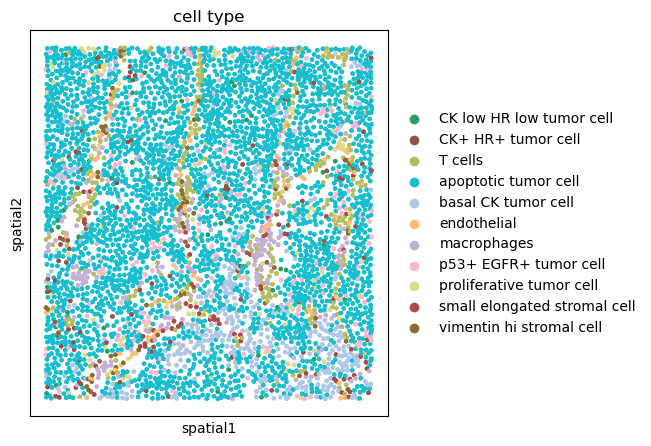

In [11]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cell type",
    size=20,
    save="cell_type.pdf",
)

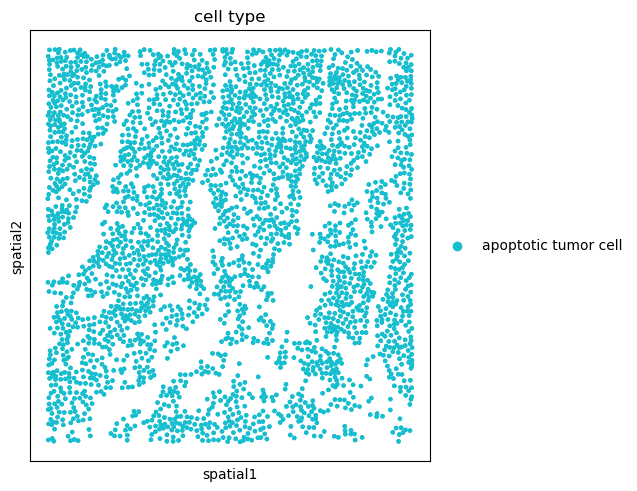

In [12]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cell type",
    groups=["apoptotic tumor cell"],
    size=20,
    save="apoptotic_tumor_cell.pdf",
)

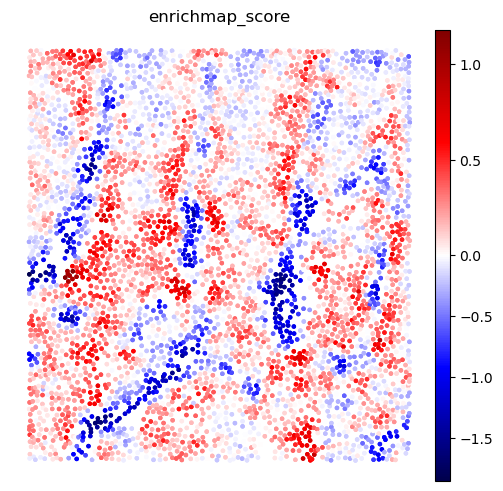

In [13]:
em.pl.spatial_enrichmap(
    adata,
    score_key="enrichmap_score",
    cmap="seismic",
    shape=None,
    size=20,
    save="enrichmap_score_apoptotic.pdf",
)

In [14]:
# Perform DEGs for each cluster
sc.tl.rank_genes_groups(adata, groupby="cell type", method="wilcoxon")
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.5, min_fold_change=2, max_out_group_fraction=0.5)

gene_list = adata.uns["rank_genes_groups"]["names"]["T cells"][:3].tolist()
gene_list

['1921755Sm149Di Vimenti', '77877Nd146Di CD68', '3281668Nd142Di Fibrone']

In [15]:
em.tl.score(
    adata,
    gene_set=gene_list,
    smoothing=True,
    correct_spatial_covariates=True,
    batch_key=None
)

Scoring signatures: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


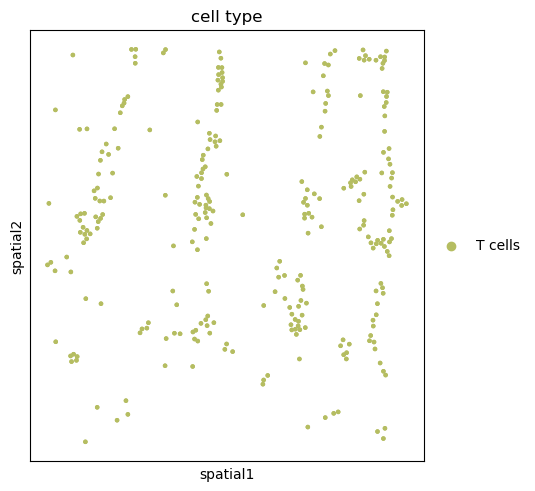

In [16]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cell type",
    groups=["T cells"],
    size=20,
    save="T_cells.pdf",
)

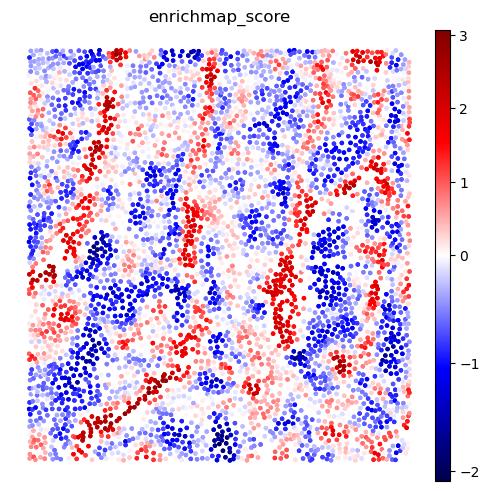

In [17]:
em.pl.spatial_enrichmap(
    adata,
    score_key="enrichmap_score",
    cmap="seismic",
    shape=None,
    size=20,
    save="enrichmap_score_T_cell.pdf",
)